<a href="https://colab.research.google.com/github/karanjogi/Practice/blob/master/Lecture_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv(filepath_or_buffer="/content/beauty.csv",
                 sep=';')

In [3]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [4]:
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [5]:
df.shape

(1260, 10)

In [6]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [8]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


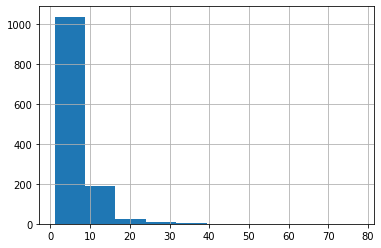

In [9]:
df['wage'].hist()

<Figure size 864x576 with 0 Axes>

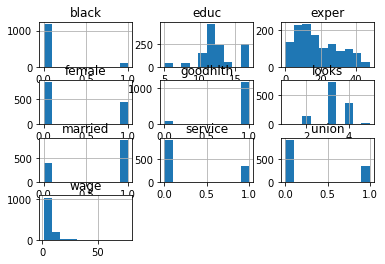

In [10]:
plt.figure(figsize=(12,8))
df.hist();

In [11]:
df['female'].nunique()

2

In [12]:
df['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

In [13]:
#Ordinal Feature
#df['looks'].nunique()
#df['looks'].unique()
df['looks'].value_counts(normalize=True)

3    0.573016
4    0.288889
2    0.112698
5    0.015079
1    0.010317
Name: looks, dtype: float64

In [14]:
#For Binary data Mean = % of true positive
df['goodhlth'].mean()
# It can also be calculated through value_counts()
df['goodhlth'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

###Indexing

.iloc(~np arrays)

In [15]:
df.iloc[:6, :5]

,wage,exper,union,goodhlth,black
0,5.73,30,0,1,0
1,4.28,28,0,1,0
2,7.96,35,0,1,0
3,11.57,38,0,1,0
4,11.42,27,0,1,0
5,3.91,20,0,0,0


In [0]:
test_df = pd.DataFrame({'age': [1, 2, 3],
                        'salary': [20, 21, 23]},
                       index=['Karan', 'Karia', 'Abhisha'])

In [17]:
test_df

,age,salary
Karan,1,20
Karia,2,21
Abhisha,3,23


In [19]:
test_df.iloc[1, 1]

21

In [20]:
test_df.loc[['Karan', 'Karia'], 'age']

Karan    1
Karia    2
Name: age, dtype: int64

###Boolean Indexing

In [23]:
df[df['wage'] > 40]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
602,77.72,9,1,1,1,1,1,1,13,4


In [25]:
df[(df['wage'] > 10) & (df['female'] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3
602,77.72,9,1,1,1,1,1,1,13,4


###apply()

In [0]:
def gender_if_to_str(gender):
  return 'female' if gender == 1 else 'male'

In [28]:
df['female'].apply(gender_if_to_str).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [29]:
#We can use lamda expression
df['female'].apply(lambda gender:
                   'female' if gender == 1 else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [30]:
df['female'].map({0: 'male', 1: 'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

###GroupBy

In [31]:
df.loc[df['female'] == 0, 'wage'].median()

6.41

In [32]:
df.loc[df['female'] == 1, 'wage'].median()

3.75

In [34]:
for gender, sub_df in df.groupby('female'):
  #print(gender)
  #print(sub_df.shape)
  print("The median wage for {} is {}".format('men' if gender == 0
                                              else 'women',
                                              sub_df['wage'].median()))

The median wage for men is 6.41
The median wage for women is 3.75


In [35]:
df.groupby('female')['wage'].median()

female
0    6.41
1    3.75
Name: wage, dtype: float64

In [36]:
df.groupby(['female', 'married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

####Crosstab

In [37]:
pd.crosstab(df['female'], df['married'])

married,0,1
female,,
0,166,658
1,223,213


In [38]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
df['educ'].nunique()

8

In [40]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

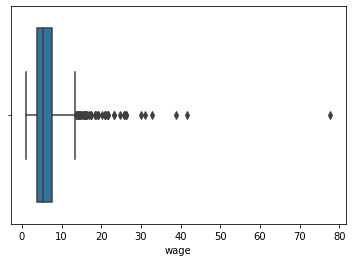

In [41]:
sns.boxplot(x='wage', data=df)

IQR (Inter Quartile Range) = Q3 - Q2
(It is not much affected by the ouliers like mean)
All the dots are outliers

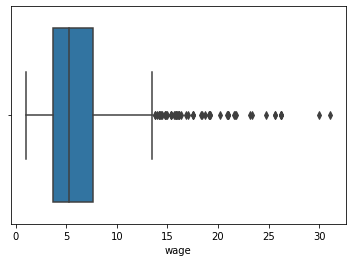

In [42]:
#Here we see some outliers so we remove them by considering wages below 32
sns.boxplot(x='wage', data=df[df['wage'] < 32])

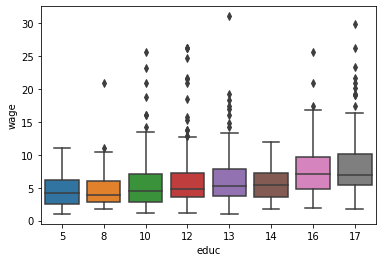

In [44]:
sns.boxplot(x='educ', y='wage', data=df[df['wage'] < 32])
# The general trend shows that the more people study the more they earn